
--- Menú Principal ---
1. Ingresar nombre de la criptomoneda
2. Ver gráfica de la criptomoneda
3. Gráfica de las 4 criptomonedas más relevantes en 2015
4. Verificar estabilidad de una criptomoneda en 2015
5. Criptomonedas por encima de la media en 2015
6. Ver Integración Social
7. Salir


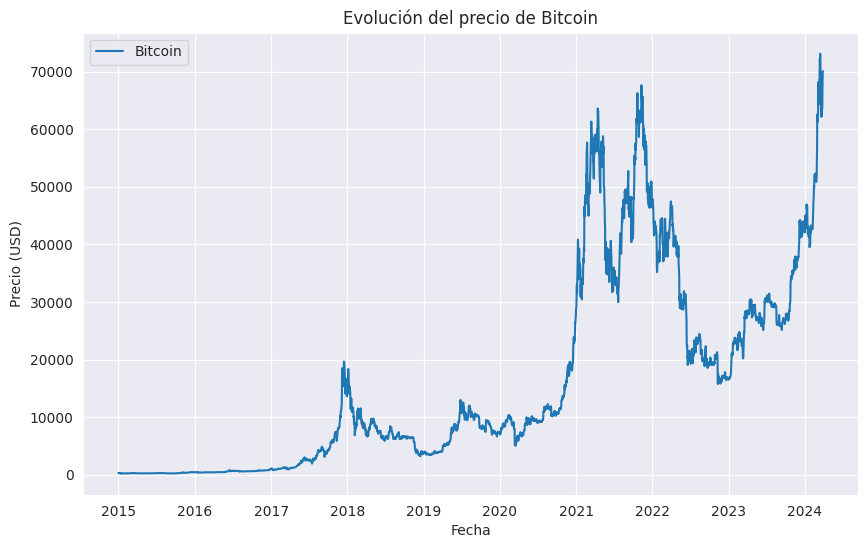


--- Menú Principal ---
1. Ingresar nombre de la criptomoneda
2. Ver gráfica de la criptomoneda
3. Gráfica de las 4 criptomonedas más relevantes en 2015
4. Verificar estabilidad de una criptomoneda en 2015
5. Criptomonedas por encima de la media en 2015
6. Ver Integración Social
7. Salir
             2023   Ownership
1     2309.521620    381696.0
2     8367.775731     38109.0
4    52976.808378   2892107.0
5    13730.514709   4451944.0
6     8715.765336     48266.0
..            ...         ...
163  81695.187071  52888108.0
164   2496.107758    512332.0
167   6253.161613   6041450.0
168   1369.129365    220509.0
169   1592.416574    238138.0

[124 rows x 2 columns]
Corr es:  -0.0024380902189847
La correlación es negativa débil. El PIB pér-cápita no es relevante en la adopción de cripto


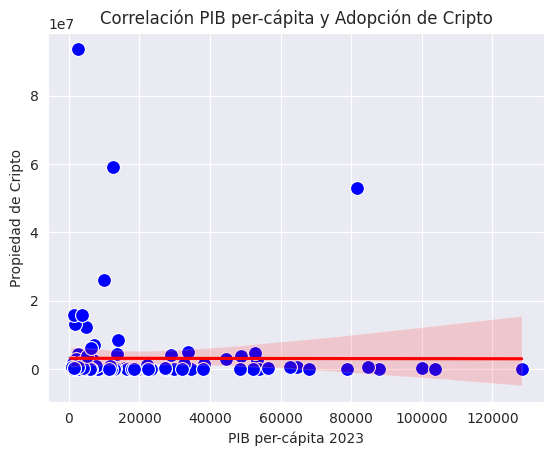


--- Menú Principal ---
1. Ingresar nombre de la criptomoneda
2. Ver gráfica de la criptomoneda
3. Gráfica de las 4 criptomonedas más relevantes en 2015
4. Verificar estabilidad de una criptomoneda en 2015
5. Criptomonedas por encima de la media en 2015
6. Ver Integración Social
7. Salir
Saliendo del programa...


In [6]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import difflib

ruta_datos = './DataEconomy'

def cargar_datos():
    archivos = [archivo for archivo in os.listdir(ruta_datos) if archivo.endswith('.csv')]
    datos_cripto = {}
    for archivo in archivos:
        nombre_moneda = archivo.split('.')[0].lower()
        try:
            df = pd.read_csv(os.path.join(ruta_datos, archivo))
            mapa_renombrar = {'Date': 'Fecha', 'date': 'Fecha', 'Timestamp': 'Fecha', 'fecha': 'Fecha',
                            'price': 'Precio', 'total_volume': 'Volumen', 'market_cap': 'Capitalizacion'}

            df.rename(columns={k: v for k, v in mapa_renombrar.items() if k in df.columns}, inplace=True)
            if 'Fecha' in df.columns:
                df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')
            if 'Precio' in df.columns:
                df['Precio'] = pd.to_numeric(df['Precio'], errors='coerce')
            if 'Volumen' in df.columns:
                df['Volumen'] = pd.to_numeric(df['Volumen'], errors='coerce')
            if 'Capitalizacion' in df.columns:
                df['Capitalizacion'] = pd.to_numeric(df['Capitalizacion'], errors='coerce')
            df.dropna(subset=['Fecha', 'Precio'], inplace=True)
            datos_cripto[nombre_moneda] = df
        except Exception as e:
            print(f"Error al procesar {archivo}: {e}")

    return datos_cripto

def sugerir_criptomoneda(entrada, crypto_data):
    available_coins = list(crypto_data.keys())
    sugerencias = difflib.get_close_matches(entrada.lower(), available_coins, n=5, cutoff=0.4)

    if sugerencias:
        print("\n¿Quisiste decir alguna de estas criptomonedas?")
        for i, sugerencia in enumerate(sugerencias, 1):
            print(f"{i}. {sugerencia.capitalize()}")
        return sugerencias
    else:
        print("\nNo se encontraron coincidencias exactas.")
        return []

def verificar_estabilidad(coin_name, crypto_data, crypto_stats):
    years = list(range(2015, 2025))
    print("\nSeleccione el año para verificar la estabilidad:")
    for year in years:
        print(year)

    while True:
        try:
            selected_year = int(input("Ingrese el año: "))
            if selected_year not in years:
                raise ValueError("Año no válido.")
            break
        except ValueError as e:
            print(e)

    if coin_name not in crypto_data:
        print(f"\nNo se encontró la criptomoneda '{coin_name}'.")
        sugerencias = sugerir_criptomoneda(coin_name, crypto_data)
        if sugerencias:
            seleccion = input("\nSeleccione el número de la criptomoneda o presione Enter para cancelar: ")
            if seleccion.isdigit() and 1 <= int(seleccion) <= len(sugerencias):
                coin_name = sugerencias[int(seleccion) - 1]
            else:
                print("Operación cancelada.")
                return

    if coin_name in crypto_data:
        stats = crypto_stats.get(coin_name, {}).get(selected_year)
        if stats:
            mean_price = stats['mean']
            std_price = stats['std']
            print(f"\nEstabilidad de {coin_name.capitalize()} en {selected_year}:")
            print(f"Precio medio: ${mean_price:.2f}")
            print(f"Desviación estándar: ${std_price:.2f}")
            if std_price < mean_price * 0.1:
                print(f"{coin_name.capitalize()} fue estable en {selected_year}.")
            else:
                print(f"{coin_name.capitalize()} no fue estable en {selected_year}.")
        else:
            print(f"\nNo se encontraron datos para {coin_name.capitalize()} en {selected_year}.\n")
    else:
        print(f"\nNo se encontraron datos para {coin_name.capitalize()} en {selected_year}.\n")


def criptomonedas_encima_media(crypto_data):
    overall_mean = np.mean([df[df['Date'].dt.year == 2015]['Price'].mean() for df in crypto_data.values() if not df[df['Date'].dt.year == 2015].empty])
    above_average_coins = [coin for coin, df in crypto_data.items() if df[df['Date'].dt.year == 2015]['Price'].mean() > overall_mean]

    print("\nCriptomonedas con precio medio por encima de la media en 2015:")
    for coin in above_average_coins:
        print(f"{coin.capitalize()}")

def calcular_estadisticas(crypto_data):
    crypto_stats = {}
    for coin, df in crypto_data.items():
        for year in range(2015, 2025):
            df_year = df[df['Fecha'].dt.year == year]
            mean_price = df_year['Precio'].mean()
            std_price = df_year['Precio'].std()
            if coin not in crypto_stats:
                crypto_stats[coin] = {}
            crypto_stats[coin][year] = {'mean': mean_price, 'std': std_price}
    return crypto_stats

def criptomonedas_encima_media(crypto_data):
    precios_medios = []
    for coin, df in crypto_data.items():
        if 'Fecha' in df.columns:
            df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')
            df_2015 = df[df['Fecha'].dt.year == 2015]
            mean_price = df_2015['Precio'].mean() if not df_2015.empty else None
            if mean_price is not None and not np.isnan(mean_price):
                precios_medios.append((coin, mean_price))

    if not precios_medios:
        print("No hay datos válidos para calcular estadísticas en 2015.")
        return

    overall_mean = np.mean([precio for _, precio in precios_medios])

    above_average_coins = [coin for coin, precio in precios_medios if precio > overall_mean]
    print("\nCriptomonedas con precio medio por encima de la media en 2015:")
    for coin in above_average_coins:
        print(f"{coin.capitalize()}")

def mostrar_estadisticas(nombre_moneda):
    df = datos_cripto.get(nombre_moneda)
    if df is not None:
        print(f"\nEstadísticas de {nombre_moneda.capitalize()}:")
        print(df.describe(), "\n")
    else:
        print(f"\nCriptomoneda {nombre_moneda} no encontrada.\n")

def ver_grafica(nombre_moneda):
    df = datos_cripto.get(nombre_moneda)
    if df is not None:
        plt.figure(figsize=(10, 6))
        plt.plot(df['Fecha'], df['Precio'], label=nombre_moneda.capitalize())
        plt.title(f'Evolución del precio de {nombre_moneda.capitalize()}')
        plt.xlabel('Fecha')
        plt.ylabel('Precio (USD)')
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        print(f"\nCriptomoneda {nombre_moneda} no encontrada.\n")

def grafica_relevantes(crypto_data):
    relevantes = ['bitcoin', 'ethereum', 'dogecoin', 'litecoin']
    print("\nSeleccione el tipo de gráfica:")
    print("1. Línea")
    print("2. Boxplot")
    print("3. Scatterplot")

    while True:
        try:
            tipo_grafica = input("Ingrese el número de la opción: ")
            if tipo_grafica not in ['1', '2', '3']:
                raise ValueError("Opción no válida.")
            break
        except ValueError as e:
            print(e)

    plt.figure(figsize=(10, 6))
    for coin in relevantes:
        if coin in crypto_data:
            df = crypto_data[coin]
            df_2015 = df[df['Fecha'].dt.year == 2015]
            if tipo_grafica == '1':
                plt.plot(df_2015['Fecha'], df_2015['Precio'], label=coin.capitalize())
            elif tipo_grafica == '2':
                sns.boxplot(x=df_2015['Fecha'].dt.month, y=df_2015['Precio'], label=coin.capitalize())
            elif tipo_grafica == '3':
                sns.scatterplot(x=df_2015['Fecha'], y=df_2015['Precio'], label=coin.capitalize())

    plt.title('Evolución de precios de las criptomonedas más relevantes en 2015')
    plt.xlabel('Fecha')
    plt.ylabel('Precio (USD)')
    plt.legend()
    plt.grid(True)
    plt.show()

def integracion_social():
    ruta_index = "./DataSocial/cripto_index.csv"
    ruta_pib = "./DataSocial/cripto_pib.csv"

    df_pib = pd.read_csv(ruta_pib)
    df_index = pd.read_csv(ruta_index,sep = ';',thousands = ',')

    df_pib_2023 = df_pib[['Country Name',"2023"]]
    df_index_2023 = df_index[['Country','Ownership']]

    df_mixed = pd.merge(
        df_pib_2023,
        df_index_2023,
        left_on="Country Name",
        right_on="Country",
        how="inner"
    )

    df_merged = df_mixed[['Country','2023','Ownership']]

    df_merged = df_merged.select_dtypes(include=['float'])
    df_merged = df_merged.dropna()

    print(df_merged)

    correlacion_pib_adopcion = df_merged['Ownership'].corr(df_merged['2023'])
    print('Corr es: ',correlacion_pib_adopcion)

    if correlacion_pib_adopcion== 1:
        print("La correlación es perfecta positiva. El PIB pér-capita y la adopción de Cripto aumentan en medidas iguales ")
    elif correlacion_pib_adopcion > 0.5:
        print("La correlación es positiva fuerte. Se podría afirmar que EL PIB-pér cápita y la adopción de cripto sí aumenta en medida conforme, entre más PIB más cripto")
    elif correlacion_pib_adopcion > 0:
        print("La correlación es positiva débil. El PIB pér-cápita no es relevante en la adopción de cripto")
    elif correlacion_pib_adopcion == 0:
        print("No hay correlación")
    elif correlacion_pib_adopcion < -0.5:
        print("La correlación es negativa fuerte. El PIB pér-cápita es relevante en la adopción de cripto entre menos más adopción")
    else:
        print("La correlación es negativa débil. El PIB pér-cápita no es relevante en la adopción de cripto")

    sns.scatterplot(data=df_merged, x='2023', y='Ownership', color='blue', s=100)
    sns.regplot(data=df_merged, x='2023', y='Ownership', scatter=False, color='red')
    plt.title('Correlación PIB per-cápita y Adopción de Cripto')
    plt.xlabel('PIB per-cápita 2023')
    plt.ylabel('Propiedad de Cripto')
    plt.show()

def mostrar_menu():
    opciones = {
        '1': "Ingresar nombre de la criptomoneda",
        '2': "Ver gráfica de la criptomoneda",
        '3': "Gráfica de las 4 criptomonedas más relevantes en 2015",
        '4': "Verificar estabilidad de una criptomoneda en 2015",
        '5': "Criptomonedas por encima de la media en 2015",
        '6': "Ver Integración Social",
        '7': "Salir"
    }
    print("\n--- Menú Principal ---")
    for clave, descripcion in opciones.items():
        print(f"{clave}. {descripcion}")
    return input("Seleccione una opción: ")

datos_cripto = cargar_datos()
crypto_stats = calcular_estadisticas(datos_cripto)

estadisticas_cripto = {}
for moneda, df in datos_cripto.items():
    df_2015 = df[df['Fecha'].dt.year == 2015]
    media_precio = df_2015['Precio'].mean()
    desviacion_precio = df_2015['Precio'].std()
    estadisticas_cripto[moneda] = {'media': media_precio, 'desviacion': desviacion_precio}

while True:
    opcion = mostrar_menu()
    datos_cripto = cargar_datos()
    crypto_stats = calcular_estadisticas(datos_cripto)
    if opcion == '1':
        nombre_moneda = input("Ingrese el nombre de la criptomoneda: ").lower()
        mostrar_estadisticas(nombre_moneda)
    elif opcion == '2':
        nombre_moneda = input("Ingrese el nombre de la criptomoneda: ").lower()
        ver_grafica(nombre_moneda)
    elif opcion == '3':
        grafica_relevantes(datos_cripto)
    elif opcion == '4':
        coin_name = input("Ingrese el nombre de la criptomoneda: ").lower()
        verificar_estabilidad(coin_name, datos_cripto, crypto_stats)
    elif opcion == '5':
        datos_cripto = cargar_datos()
        criptomonedas_encima_media(datos_cripto)
    elif opcion == '6':
        integracion_social()
    elif opcion == '7':
        print("Saliendo del programa...")
        break
    else:
        print("Opción Incorrecta, Intente de nuevo")
